In [1665]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import math

# Import python library to read las files
import lasio

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from skopt.space import Real, Categorical, Integer
from sklearn.preprocessing import LabelEncoder

In [1667]:
# Define the directory containing las files
directory = 'Data'

In [1669]:
# Use glob to get a list of all las files in the directory
las_files = glob.glob(os.path.join(directory, '*.las'))

In [1673]:
# Create an empty dictionary to store the DataFrames
dataframes = {}


wellsList = []

# Iterate through the list of las files
for files in las_files:
    
    # Extract the filename (without extension) to use as the DataFrame key
    lasName = os.path.splitext(os.path.basename(files))[0]

    # Read the .las file into a pandas DataFrame
    df = lasio.read(files).df()
    
    # Reset index to make 'DEPT' (or equivalent depth curve) a column
    df = df.reset_index().rename(columns={'index': 'DEPTH'})

    # Store the DataFrame in the dictionary with the filename as the key
    dataframes[lasName] = df

    wellsList.append(dataframes[lasName])

In [1675]:
ATLAS = pd.read_csv('Data/atlasFormationTops.txt', sep='[|,]', engine = 'python')
BOTEIN = pd.read_csv('Data/boteinFormationTops.txt', sep='[|,]', engine = 'python')
CAPELLA = pd.read_csv('Data/capellaFormationTops.txt', sep='[|,]', engine = 'python')
DENEB = pd.read_csv('Data/denebFormationTops.txt', sep='[|,]', engine = 'python')
ELECTRA = pd.read_csv('Data/electraFormationTops.txt', sep='[|,]', engine = 'python')

In [1677]:
ATLAS.columns=['DEPTH', 'FORMATION']
ATLAS

,DEPTH,FORMATION
0,4.6619,Doyles Creek Subgroup
1,435.4607,Horseshoe Creek Subgroup
2,514.1221,Apple Tree Flat Subgroup
3,732.2914,Watts Sandstone
4,743.8090,Denman Fm
5,881.1697,Mt Leonard Fm
6,1001.4479,Althorpe Fm
7,1015.4708,Malabar Fm
8,1056.3090,Mt Ogilvie Fm
9,1104.1063,Milbrodale Fm


In [1679]:
# Replace 'DALWOOD GROUP' with 'Dalwood Group' only in column 'B'
ATLAS['FORMATION'] = ATLAS['FORMATION'].replace('DALWOOD GROUP', 'Dalwood Group') 

In [1681]:
boteinFormationdf.drop(boteinFormationdf.tail(1).index, inplace=True)

<Figure size 800x1000 with 0 Axes>

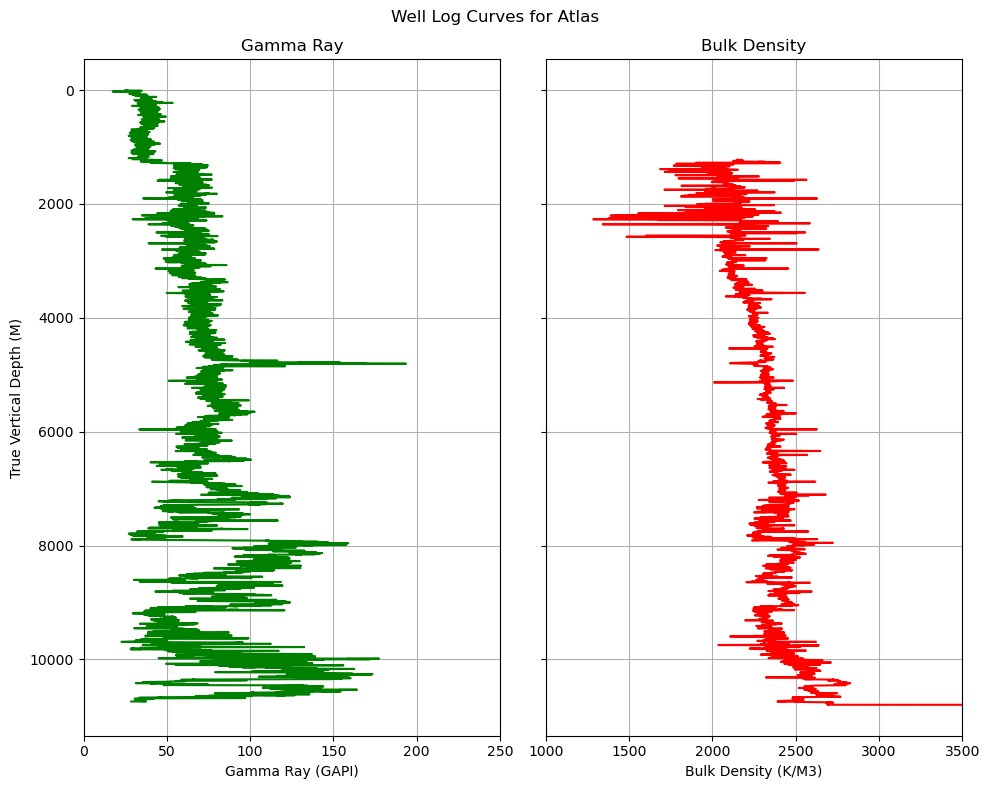

In [1720]:
plt.figure(figsize=(8, 10)) # Create a figure
# Example of plotting multiple curves on separate subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharey=True)

axes[0].plot(dataframes['atlas']['GR'], dataframes['atlas'].index, color="green", label="Gamma Ray")
axes[0].set_xlim(0, 250)  # Setting x-axis limits for Gamma Ray
axes[0].set_xlabel("Gamma Ray (GAPI)")
axes[0].set_ylabel("True Vertical Depth (M)")
axes[0].set_title("Gamma Ray")
axes[0].grid(True)

axes[1].plot(dataframes['atlas']['RHOB'], dataframes['atlas'].index, color="red", label="LLD Resistivity")
axes[1].set_xlim(1000, 3500)  # Setting x-axis limits
axes[1].set_xlabel("Bulk Density (K/M3)")
axes[1].set_title("Bulk Density")
axes[1].grid(True)

plt.suptitle("Well Log Curves for Atlas")
plt.gca().invert_yaxis()
plt.tight_layout()

# Save the plot
plt.savefig('Images/gammaRaybulkDensity_Atlas', dpi=300)

plt.show()

<Figure size 800x1000 with 0 Axes>

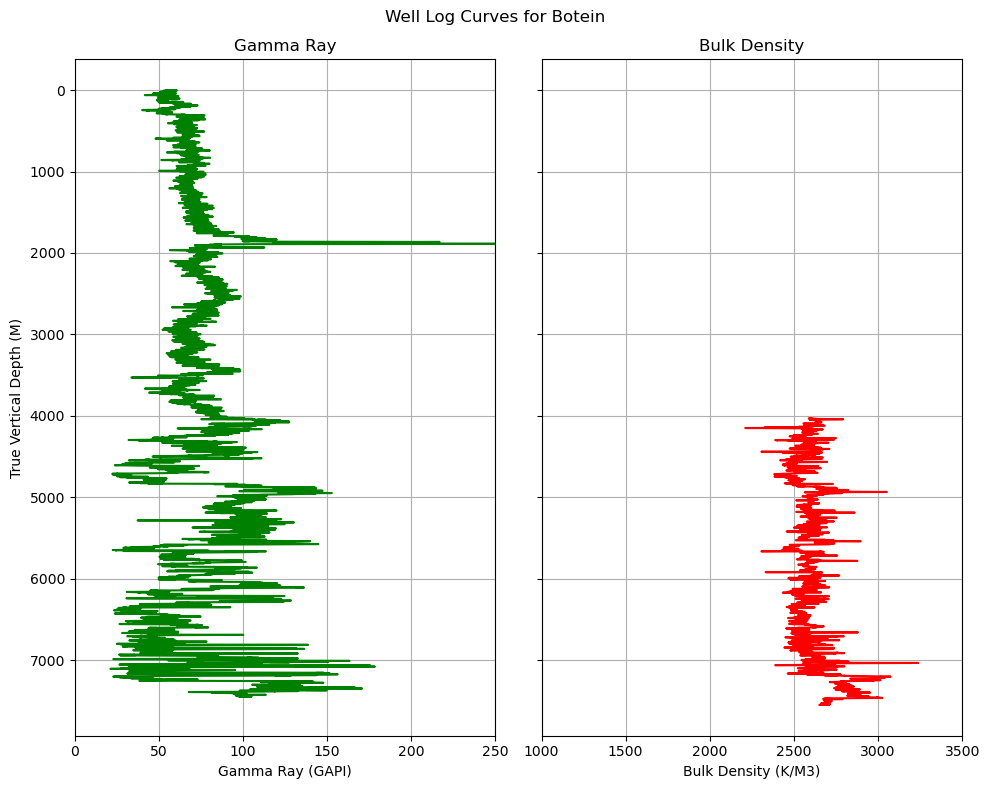

In [1718]:
plt.figure(figsize=(8, 10)) # Create a figure
# Example of plotting multiple curves on separate subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharey=True)

axes[0].plot(dataframes['botein']['GR'], dataframes['botein'].index, color="green", label="Gamma Ray")
axes[0].set_xlim(0, 250)  # Setting x-axis limits for Gamma Ray
axes[0].set_xlabel("Gamma Ray (GAPI)")
axes[0].set_title("Gamma Ray")
axes[0].set_ylabel("True Vertical Depth (M)")
axes[0].grid(True)

axes[1].plot(dataframes['botein']['RHOB'], dataframes['botein'].index, color="red", label="Bulk Density")
axes[1].set_xlim(1000, 3500)  # Setting x-axis limits
axes[1].set_xlabel("Bulk Density (K/M3)")
axes[1].set_title("Bulk Density")
axes[1].grid(True)

plt.suptitle("Well Log Curves for Botein")
plt.gca().invert_yaxis()
plt.tight_layout()

# Save the plot
plt.savefig('Images/gammaRaybulkDensity_Botein', dpi=300)
plt.show()

<Figure size 800x1000 with 0 Axes>

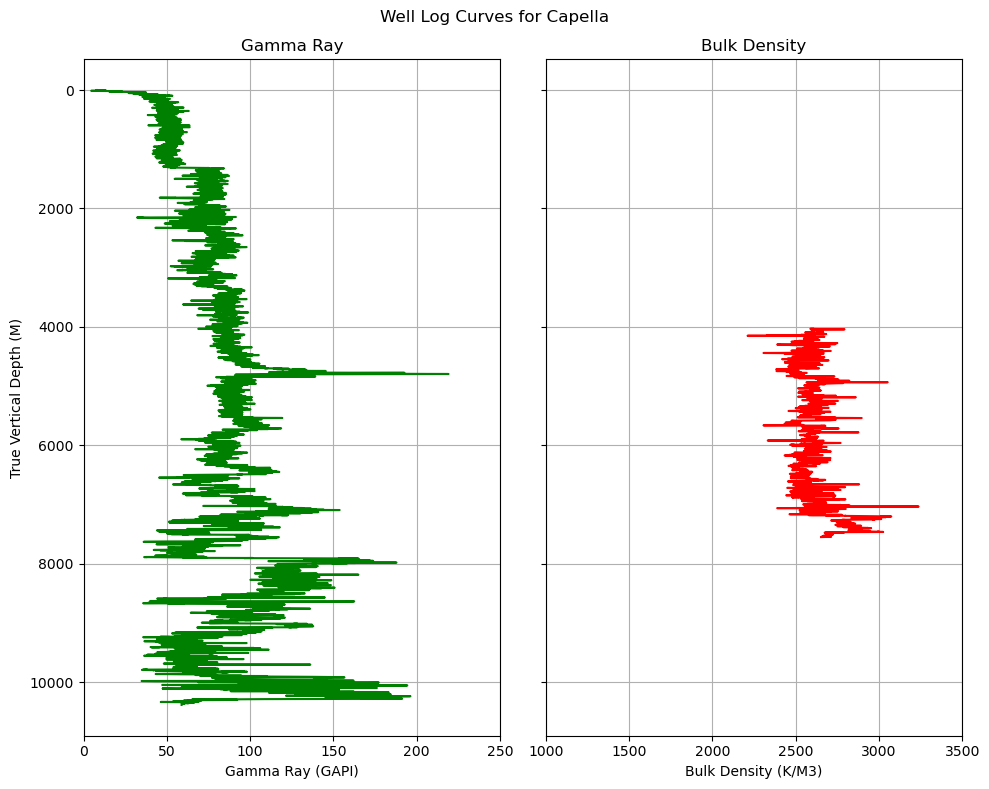

In [1722]:
plt.figure(figsize=(8, 10)) # Create a figure
# Example of plotting multiple curves on separate subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharey=True)

axes[0].plot(dataframes['capella']['GR'], dataframes['capella'].index, color="green", label="Gamma Ray")
axes[0].set_xlim(0, 250)  # Setting x-axis limits for Gamma Ray
axes[0].set_xlabel("Gamma Ray (GAPI)")
axes[0].set_title("Gamma Ray")
axes[0].set_ylabel("True Vertical Depth (M)")
axes[0].grid(True)

axes[1].plot(dataframes['botein']['RHOB'], dataframes['botein'].index, color="red", label="Bulk Density")
axes[1].set_xlim(1000, 3500)  # Setting x-axis limits
axes[1].set_xlabel("Bulk Density (K/M3)")
axes[1].set_title("Bulk Density")
axes[1].grid(True)

plt.suptitle("Well Log Curves for Capella")
plt.gca().invert_yaxis()
plt.tight_layout()
# Save the plot
plt.savefig('Images/gammaRaybulkDensity_Capella', dpi=300)

plt.show()

<Figure size 800x1000 with 0 Axes>

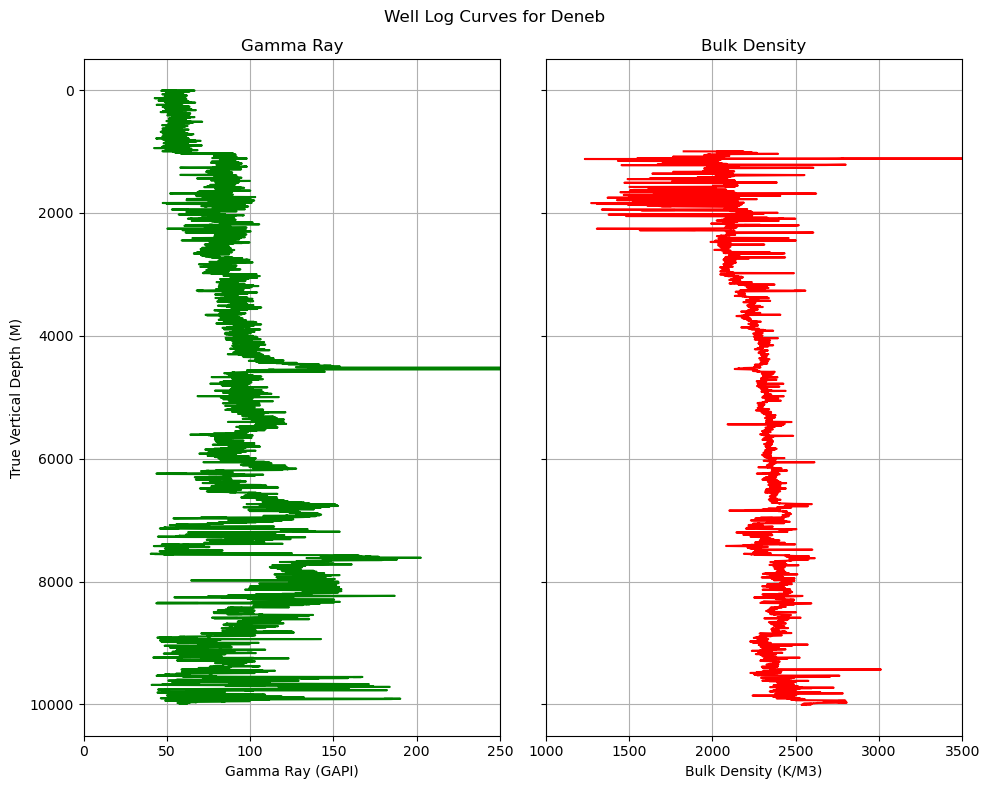

In [1724]:
plt.figure(figsize=(8, 10)) # Create a figure
# Example of plotting multiple curves on separate subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharey=True)

axes[0].plot(dataframes['deneb']['GR'], dataframes['deneb'].index, color="green", label="Gamma Ray")
axes[0].set_xlim(0, 250)  # Setting x-axis limits for Gamma Ray
axes[0].set_xlabel("Gamma Ray (GAPI)")
axes[0].set_title("Gamma Ray")
axes[0].set_ylabel("True Vertical Depth (M)")
axes[0].grid(True)


axes[1].plot(dataframes['deneb']['RHOB'], dataframes['deneb'].index, color="red", label="Bulk Density")
axes[1].set_xlim(1000, 3500)  # Setting x-axis limits
axes[1].set_xlabel("Bulk Density (K/M3)")
axes[1].set_title("Bulk Density")
axes[1].grid(True)

plt.suptitle("Well Log Curves for Deneb")
plt.gca().invert_yaxis()
plt.tight_layout()
# Save the plot
plt.savefig('Images/gammaRaybulkDensity_Deneb', dpi=300)

plt.show()

<Figure size 800x1000 with 0 Axes>

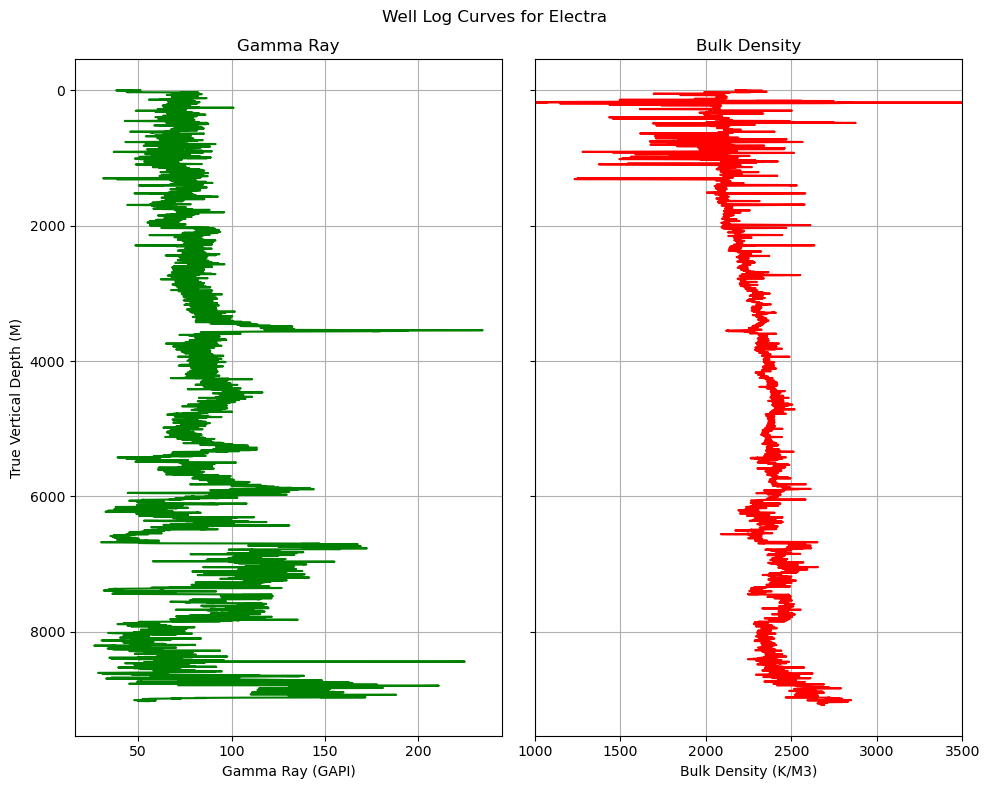

In [1726]:
plt.figure(figsize=(8, 10)) # Create a figure
# Example of plotting multiple curves on separate subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharey=True)

axes[0].plot(dataframes['electra']['GR'], dataframes['electra'].index, color="green", label="Gamma Ray")
axes[0].set_xlabel("Gamma Ray (GAPI)")
axes[0].set_title("Gamma Ray")
axes[0].set_ylabel("True Vertical Depth (M)")
axes[0].grid(True)

axes[1].plot(dataframes['electra']['RHOB'], dataframes['electra'].index, color="red", label="Bulk Density")
plt.xlim(1000, 3500)
axes[1].set_xlabel("Bulk Density (K/M3)")
axes[1].set_title("Bulk Density")
axes[1].grid(True)

plt.suptitle("Well Log Curves for Electra")
plt.gca().invert_yaxis()
plt.tight_layout()
# Save the plot
plt.savefig('Images/gammaRaybulkDensity_Electra', dpi=300)

plt.show()

In [1693]:
#Extract well coordinates
locationDF = pd.DataFrame()

# Define the directory containing las files
directory = 'Data'

# Use glob to get a list of all las files in the directory
las_files = glob.glob(os.path.join(directory, '*.las'))

# Accessing well header parameters
for well in las_files:
    las = lasio.read(well)

    #Well Sirius coordicates are located in the params section of the .las file
    if well == "Data\\sirius.las":
        location = {"Well": well,
               "Easting": las.params['XREF'].value,
               "Northing": las.params['YREF'].value}

    #The rest of the well data contains the coordinates in the well section of the .las file
    else:
        location = {"Well": well,
               "Easting": las.well['X'].value,
               "Northing": las.well['Y'].value}

    # create a dataframe and append the location summary to it        
    Location = pd.concat([locationDF, pd.DataFrame([location])])

    # Remove the specific text "Data", "\" and ".las" from 'Well' column
    Location['Well'] = Location['Well'].str.replace('Data', '', regex=False)
    Location['Well'] = Location['Well'].str.replace('\\', '', regex=False)
    Location['Well'] = Location['Well'].str.replace('.las', '', regex=False)

    locationDF = Location

In [1695]:
#initialize empty dataframe
location = pd.DataFrame()
   
for i in range(len(locationDF)):
        
    for j in range(len(locationDF)):
        
        well = locationDF['Well'].iloc[i]
        easting = locationDF['Easting'].iloc[i]
        northing = locationDF['Northing'].iloc[i]
        delta_easting = locationDF['Easting'].iloc[i] - locationDF['Easting'].iloc[j]
        delta_northing = locationDF['Northing'].iloc[i] - locationDF['Northing'].iloc[j]
        distance = math.sqrt(delta_easting**2 + delta_northing**2)

        summary = {
            'Well': well,
            'Easting': easting,
            'Northing': northing,
            f'Distance_from_{locationDF['Well'].iloc[j]}': distance,
        }

        wellLocation = pd.concat([location, pd.DataFrame([summary])])
        
        location = wellLocation
        #flatten the dataframe
        wellDistance = location.groupby('Well').first().reset_index()

In [1697]:
wellDistance

,Well,Easting,Northing,Distance_from_atlas,Distance_from_botein,Distance_from_capella,Distance_from_deneb,Distance_from_electra,Distance_from_sirius
0,atlas,6.535239e+05,8.158308e+06,0.000000e+00,1.295654e+03,6.736861e+02,1.763853e+03,1.866928e+07,1.866658e+07
1,botein,6.525877e+05,8.157412e+06,1.295654e+03,0.000000e+00,6.493910e+02,4.967219e+02,1.867024e+07,1.866755e+07
2,capella,6.529543e+05,8.157948e+06,6.736861e+02,6.493910e+02,0.000000e+00,1.140937e+03,1.866968e+07,1.866699e+07
3,deneb,6.523907e+05,8.156956e+06,1.763853e+03,4.967219e+02,1.140937e+03,0.000000e+00,1.867071e+07,1.866802e+07
4,electra,2.143052e+06,2.676807e+07,1.866928e+07,1.867024e+07,1.866968e+07,1.867071e+07,0.000000e+00,2.951348e+03
5,sirius,2.141636e+06,2.676548e+07,1.866658e+07,1.866755e+07,1.866699e+07,1.866802e+07,2.951348e+03,0.000000e+00


Extract rock Formation Tops for each well

In [1728]:
# Formation tops list of files from folder
formationDF = pd.DataFrame()
formationTops_list = []

for item in os.listdir('Data'):
    item_path = os.path.join('Data', item)
    if os.path.isfile(item_path) and item.endswith('.txt'):
        formationTops_list.append(item)

for name in formationTops_list:
    well = pd.read_csv('Data/'+name, sep='[|,]', engine = 'python')
    well.columns=['DEPTH', 'FORMATION']
    
    if name == 'atlasFormationTops.txt':
        # Replace 'DALWOOD GROUP' with 'Dalwood Group' only in column
        well['FORMATION'] = well['FORMATION'].replace('DALWOOD GROUP', 'Dalwood Group')
        
    elif name == 'boteinFormationTops':
        #drop last row as it is duplicate
        boteinFormationdf.drop(boteinFormationdf.tail(1).index, inplace=True)

    for index, row in well.iterrows():
        summary = {
            "Well": name,
            "Depth": row['DEPTH'],
            "Formation": row['FORMATION']}
        
        # create a dataframe and append the summary to it        
        formation = pd.concat([formationDF, pd.DataFrame([summary])])
        
        # Remove the specific text "FormationTops.txt" from 'Well' column
        formation['Well'] = formation['Well'].str.replace('FormationTops.txt', '', regex=False)
        
        formationDF = formation

In [1702]:
formationDF

,Well,Depth,Formation
0,atlas,4.6619,Doyles Creek Subgroup
0,atlas,435.4607,Horseshoe Creek Subgroup
0,atlas,514.1221,Apple Tree Flat Subgroup
0,atlas,732.2914,Watts Sandstone
0,atlas,743.8090,Denman Fm
...,...,...,...
0,electra,4366.1417,Mulbring Siltstone
0,electra,4566.9291,Muree Sandstone
0,electra,4960.6299,Branxton Fm
0,electra,5037.5474,Greta Coal Measures


In [1704]:
#Merge the formation tops and coordinates
wellFormationTops = pd.merge(wellDistance,formationDF, on='Well', how='inner')

In [1730]:
wellFormationTops

,Well,Easting,Northing,Distance_from_atlas,Distance_from_botein,Distance_from_capella,Distance_from_deneb,Distance_from_electra,Distance_from_sirius,Depth,Formation
0,atlas,6.535239e+05,8.158308e+06,0.000000e+00,1.295654e+03,6.736861e+02,1.763853e+03,1.866928e+07,1.866658e+07,4.6619,Doyles Creek Subgroup
1,atlas,6.535239e+05,8.158308e+06,0.000000e+00,1.295654e+03,6.736861e+02,1.763853e+03,1.866928e+07,1.866658e+07,435.4607,Horseshoe Creek Subgroup
2,atlas,6.535239e+05,8.158308e+06,0.000000e+00,1.295654e+03,6.736861e+02,1.763853e+03,1.866928e+07,1.866658e+07,514.1221,Apple Tree Flat Subgroup
3,atlas,6.535239e+05,8.158308e+06,0.000000e+00,1.295654e+03,6.736861e+02,1.763853e+03,1.866928e+07,1.866658e+07,732.2914,Watts Sandstone
4,atlas,6.535239e+05,8.158308e+06,0.000000e+00,1.295654e+03,6.736861e+02,1.763853e+03,1.866928e+07,1.866658e+07,743.8090,Denman Fm
...,...,...,...,...,...,...,...,...,...,...,...
85,electra,2.143052e+06,2.676807e+07,1.866928e+07,1.867024e+07,1.866968e+07,1.867071e+07,0.000000e+00,2.951348e+03,4366.1417,Mulbring Siltstone
86,electra,2.143052e+06,2.676807e+07,1.866928e+07,1.867024e+07,1.866968e+07,1.867071e+07,0.000000e+00,2.951348e+03,4566.9291,Muree Sandstone
87,electra,2.143052e+06,2.676807e+07,1.866928e+07,1.867024e+07,1.866968e+07,1.867071e+07,0.000000e+00,2.951348e+03,4960.6299,Branxton Fm
88,electra,2.143052e+06,2.676807e+07,1.866928e+07,1.867024e+07,1.866968e+07,1.867071e+07,0.000000e+00,2.951348e+03,5037.5474,Greta Coal Measures


In [1706]:
wellFormationTops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Well                   90 non-null     object 
 1   Easting                90 non-null     float64
 2   Northing               90 non-null     float64
 3   Distance_from_atlas    90 non-null     float64
 4   Distance_from_botein   90 non-null     float64
 5   Distance_from_capella  90 non-null     float64
 6   Distance_from_deneb    90 non-null     float64
 7   Distance_from_electra  90 non-null     float64
 8   Distance_from_sirius   90 non-null     float64
 9   Depth                  90 non-null     float64
 10  Formation              90 non-null     object 
dtypes: float64(9), object(2)
memory usage: 7.9+ KB


In [1774]:
modelDF = pd.DataFrame()

# Define features (X) and target (y)
X = wellFormationTops[['Easting', 'Northing', 'Formation']]
y = wellFormationTops['Depth']

#Models to evaluate, KNN (use 5 as K value), Linear Regression, Decision Tree Regressor, SVM, Ridge, RandomForestRegressor
regressor = ['LinearRegression', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR', 'Ridge', 'RandomForestRegressor']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building a preprocessing pipeline
numericalCols = X.select_dtypes(include=['int64', 'float64']).columns
categoricalCols = X.select_dtypes(include=['object']).columns

#define separate pipelines for numerical and categorical features.
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numericalCols),
                  ('cat', OneHotEncoder(handle_unknown='ignore'), categoricalCols)])

for name in regressor:

    if name == 'LinearRegression':
        model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])
        
    elif name == 'KNeighborsRegressor':
        model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', KNeighborsRegressor(n_neighbors=6))])

    elif name == 'DecisionTreeRegressor':
        model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', DecisionTreeRegressor(max_depth=4, random_state=42))])

    elif name == 'SVR':
        model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))])
              
    elif name == 'Ridge':
        model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge(alpha=1.0))])

    elif name == 'RandomForestRegressor':
        model = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    # Alternatively, calculate R² score using sklearn.metrics.r2_score
    
    r2_score_from_function = r2_score(y_test, y_pred)
    print(f"R² score from r2_score function: {r2_score_from_function:.4f}")

    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE: {mse}")

    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error (MAE): {mae}")

    # Example of predicting for a new location
    new_location = pd.DataFrame({'Easting': [653523.9460707], 'Northing': [8158307.615707], 'Formation': ['Muree Sandstone']})
    predicted_value = model.predict(new_location).round()
    print(f"New Depth: {predicted_value[0]:.2f}")

    modelSummary = {
        "Model": name,
        "R-Squared": r2_score_from_function,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
        "Example Easting": 653523.9460707,
        "Example Northing": 8158307.615707,
        "Example Formation": 'Muree Sandstone',
        "Predicted Depth (M)": predicted_value,
        "Actual Depth at that Location (M)": 1401
    }
        
    # create a dataframe and append the summary to it        
    summary = pd.concat([modelDF, pd.DataFrame([modelSummary])])
        
    modelDF = summary

R² score from r2_score function: 0.7929
MSE: 173992.94936104122
Mean Absolute Error (MAE): 264.77856946149944
New Depth: 1358.00
R² score from r2_score function: 0.4154
MSE: 491030.19894297427
Mean Absolute Error (MAE): 405.57220123456796
New Depth: 1415.00
R² score from r2_score function: 0.4928
MSE: 426045.1114958462
Mean Absolute Error (MAE): 351.5176618085618
New Depth: 1169.00
R² score from r2_score function: 0.5079
MSE: 413363.5398289817
Mean Absolute Error (MAE): 413.42916930258616
New Depth: 1226.00
R² score from r2_score function: 0.8092
MSE: 160264.20093694588
Mean Absolute Error (MAE): 206.32689346757562
New Depth: 1324.00
R² score from r2_score function: 0.5908
MSE: 343688.5521720547
Mean Absolute Error (MAE): 232.25747555555557
New Depth: 1388.00


In [1776]:
modelDF

,Model,R-Squared,Mean Squared Error,Mean Absolute Error,Example Easting,Example Northing,Example Formation,Predicted Depth (M),Actual Depth at that Location (M)
0,LinearRegression,0.792856,173992.949361,264.778569,653523.946071,8.158308e+06,Muree Sandstone,[1358.0],1401
0,KNeighborsRegressor,0.415414,491030.198943,405.572201,653523.946071,8.158308e+06,Muree Sandstone,[1415.0],1401
0,DecisionTreeRegressor,0.492781,426045.111496,351.517662,653523.946071,8.158308e+06,Muree Sandstone,[1169.0],1401
0,SVR,0.507878,413363.539829,413.429169,653523.946071,8.158308e+06,Muree Sandstone,[1226.0],1401
0,Ridge,0.809201,160264.200937,206.326893,653523.946071,8.158308e+06,Muree Sandstone,[1324.0],1401
0,RandomForestRegressor,0.590829,343688.552172,232.257476,653523.946071,8.158308e+06,Muree Sandstone,[1388.0],1401
